In [156]:
import numpy as np
import pandas as pd
import seaborn as sns

In [178]:
sns.set_theme(rc={'figure.figsize': (20, 20)})

**Научимся считать метрики в pandas-табличках**

Представим, что 2 добрых и очень-очень умных гнома прокрались к нам в данные, описывающие различные поездки в такси.
Далее, для каждого объекта (и его признаков, соответственно), гномы построили модели предсказания того, какая должна была быть у данных заказов длительность исполнения. Прогнозы своих моделей они положили соответственно в колонки **prediction_1** и **prediction_2**

In [38]:
df = pd.read_csv('Data/taxi_dataset_with_predictions.csv', index_col=0)

In [39]:
df.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance_km,prediction_1,prediction_2
id,,,,,,,,
id2875421,1,2016-03-14 17:24:55,930.399753,0,455.0,1.500479,578.156451,355.270710
id2377394,0,2016-06-12 00:43:35,930.399753,0,663.0,1.807119,962.657188,674.295781
id3858529,1,2016-01-19 11:35:24,930.399753,0,2124.0,6.392080,2546.180515,2422.132431
id3504673,1,2016-04-06 19:32:31,930.399753,0,429.0,1.487155,737.926214,795.992362
id2181028,1,2016-03-26 13:30:55,930.399753,0,435.0,1.189925,666.070794,-4.158492


<Axes: >

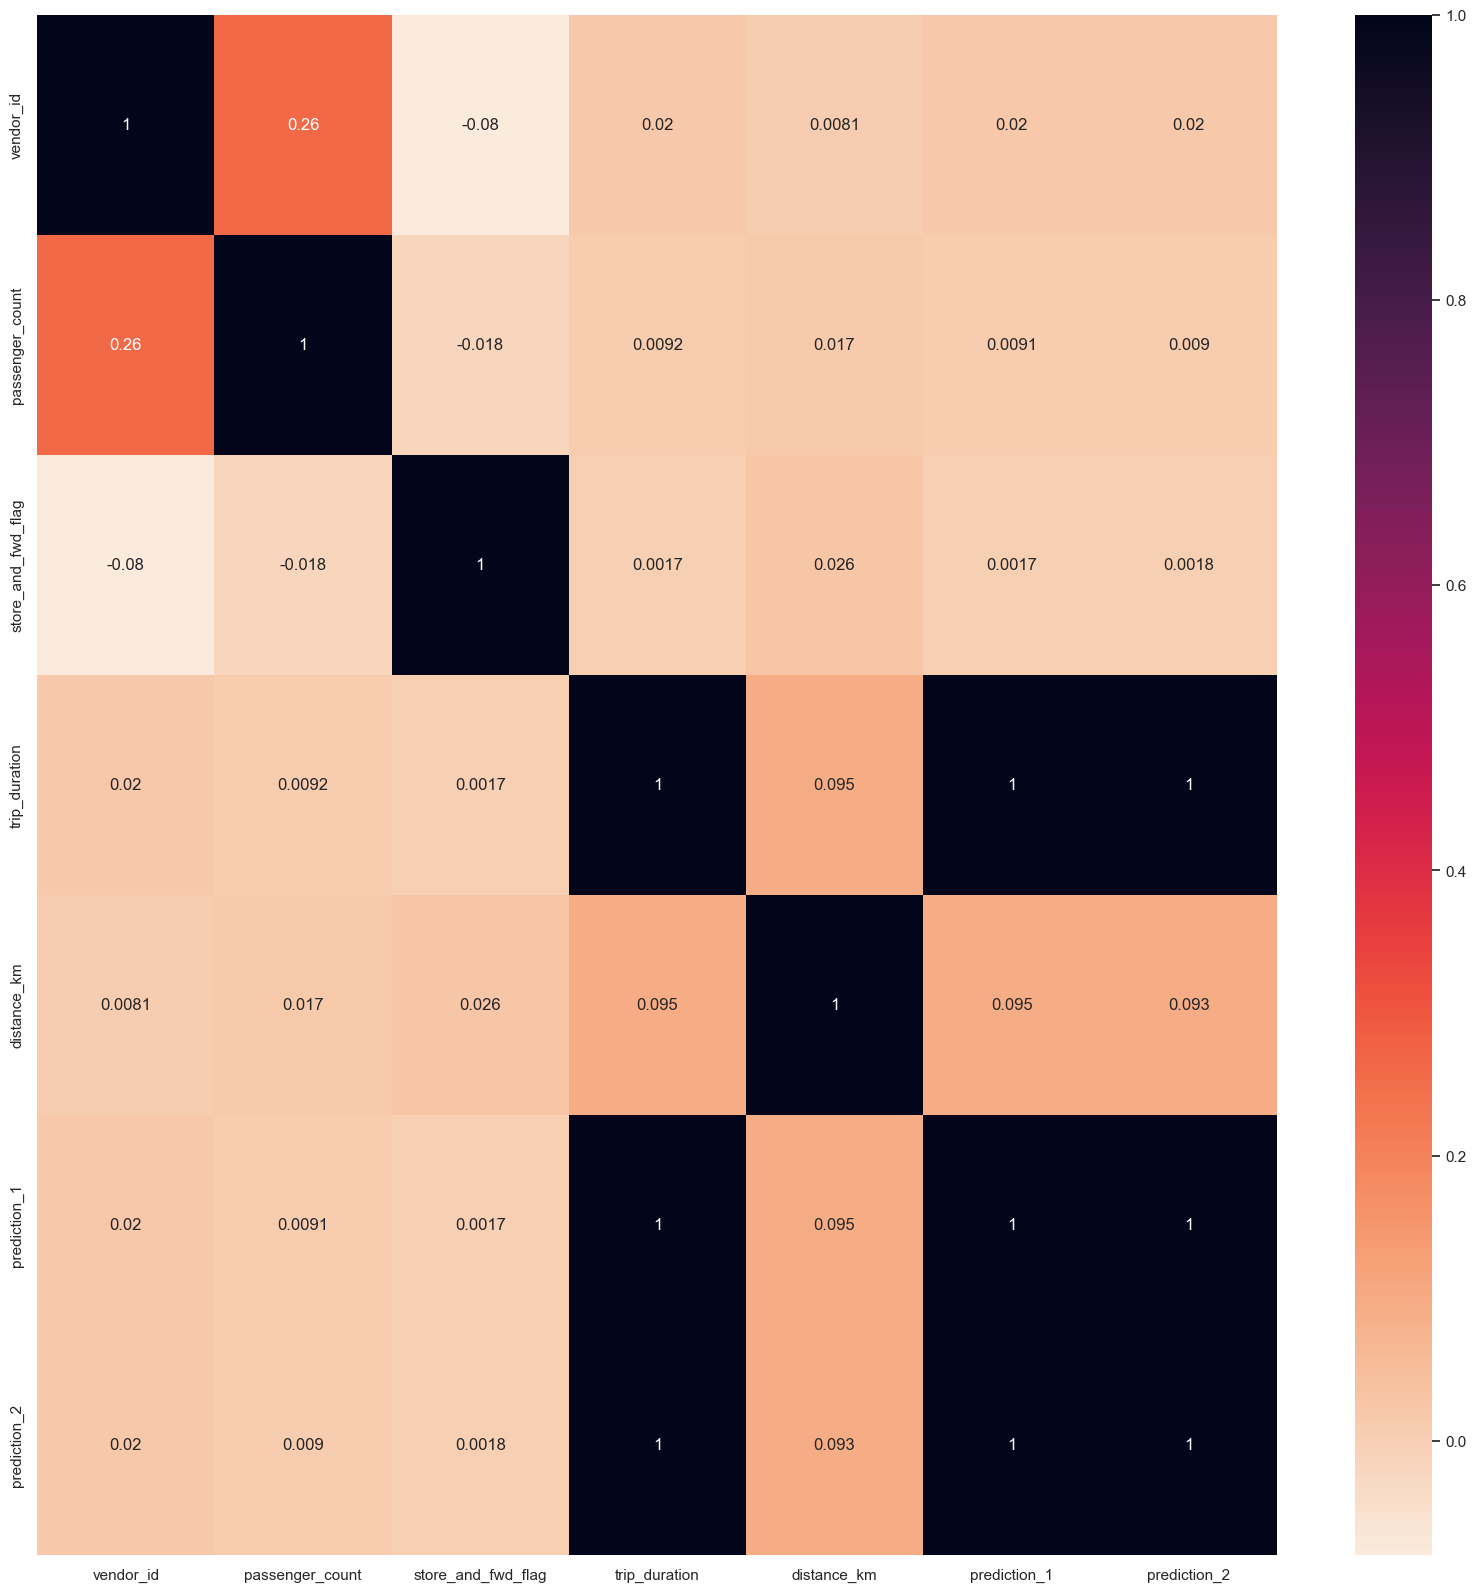

In [186]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='rocket_r')

In [40]:
df.describe()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,prediction_1,prediction_2
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,5.349503e-01,9.594923e+02,5.515396e-03,9.594923e+02,3.444384e+00,1.259500e+03,1.009205e+03
std,4.987772e-01,4.792768e+01,7.406066e-02,5.237432e+03,4.298084e+00,5.238558e+03,5.248689e+03
min,0.000000e+00,1.966667e+01,0.000000e+00,1.000000e+00,0.000000e+00,-5.139017e+01,-1.376038e+03
25%,0.000000e+00,9.303998e+02,0.000000e+00,3.970000e+02,1.233229e+00,6.963462e+02,3.985257e+02
50%,1.000000e+00,9.303998e+02,0.000000e+00,6.620000e+02,2.096021e+00,9.689693e+02,7.666140e+02
75%,1.000000e+00,1.005458e+03,0.000000e+00,1.075000e+03,3.879732e+00,1.384666e+03,1.225387e+03
max,1.000000e+00,1.718433e+03,1.000000e+00,3.526282e+06,1.243018e+03,3.526741e+06,3.525841e+06


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   pickup_datetime     1458644 non-null  object 
 2   passenger_count     1458644 non-null  float64
 3   store_and_fwd_flag  1458644 non-null  int64  
 4   trip_duration       1458644 non-null  float64
 5   distance_km         1458644 non-null  float64
 6   prediction_1        1458644 non-null  float64
 7   prediction_2        1458644 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 100.2+ MB


In [101]:
data = pd.melt(df, value_vars=['trip_duration', 'prediction_1', 'prediction_2'])
data = data.query('value > 0')

In [171]:
data

,variable,value
0,trip_duration,455.000000
1,trip_duration,663.000000
2,trip_duration,2124.000000
3,trip_duration,429.000000
4,trip_duration,435.000000
...,...,...
4375927,prediction_2,1230.540125
4375928,prediction_2,1568.424070
4375929,prediction_2,780.697509
4375930,prediction_2,641.495195


In [174]:
data.groupby('variable').agg({'value': ['mean', 'median']})

value            
                      mean      median
variable                              
prediction_1   1259.504028  968.972903
prediction_2   1091.551470  815.705990
trip_duration   959.492273  662.000000

<Axes: ylabel='value'>

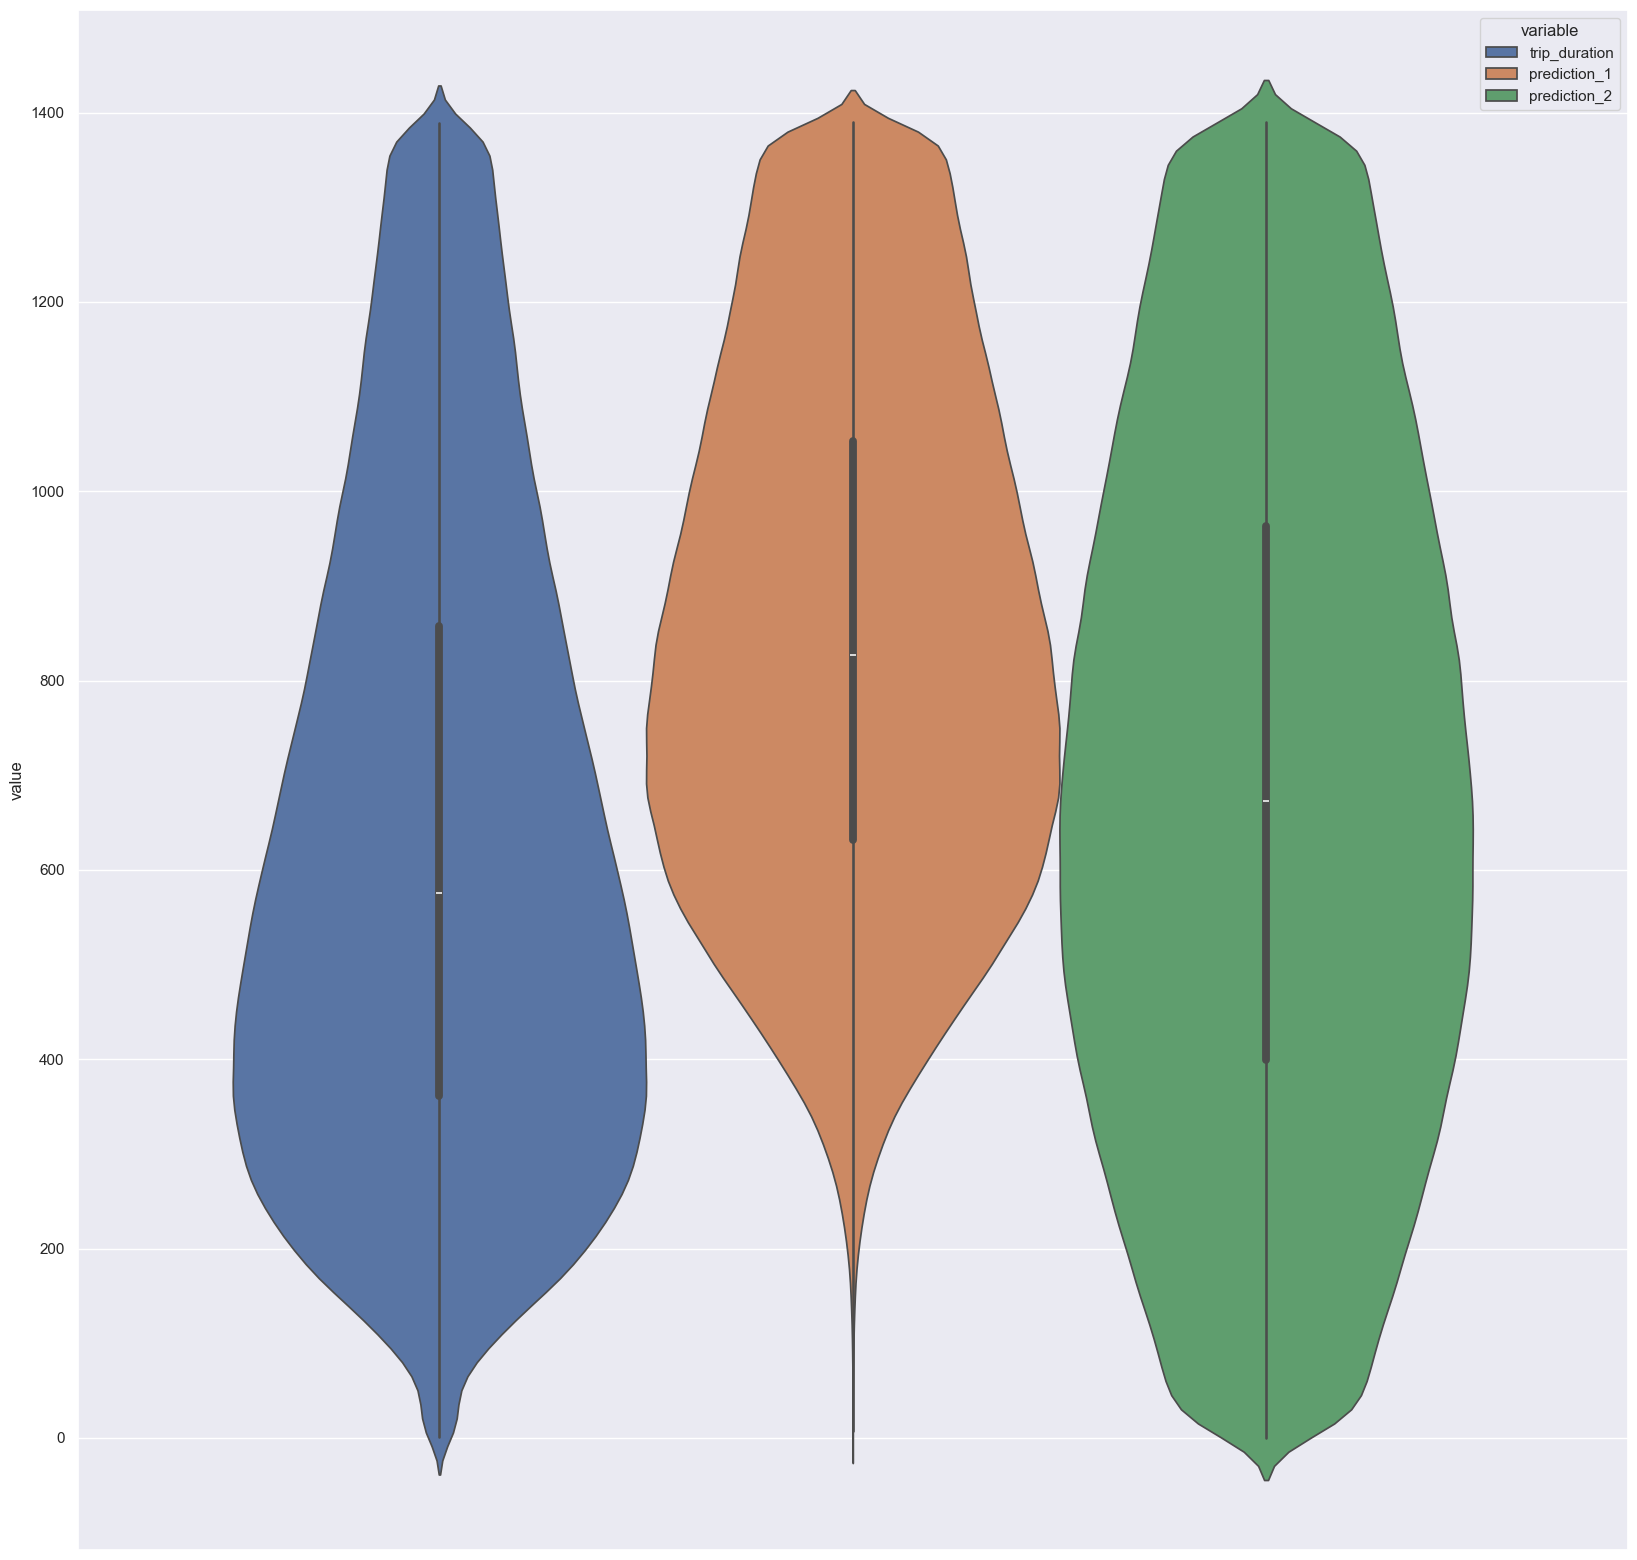

In [177]:
sns.violinplot(data=data[data['value'] < data['value'].quantile([0.80]).iloc[0]], y='value', hue='variable', )

Давайте попробуем оценить, насколько и вправду гномы оказались умными и осведомленными в области построения различных моделей машинного обучения, и найдем, насколько сильно их модели ошибаются на наших данных!

В начале посчитайте **MSE** модели. Для этого нужно посчитать квадратичное отклонение на каждом объекте, а потом просто усредниться! Полезно иметь формулу перед глазами.

$$
MSE = \frac{1}{n} \sum_i^n (a(x_i)-y_i)^2
$$

Положите результаты в переменные *error_1* и *error_2* соответственно.

In [111]:
### Your code is here
error_1 = ((df.trip_duration - df.prediction_1) ** 2).mean()
error_2 = ((df.trip_duration - df.prediction_2) ** 2).mean()

In [114]:
from sklearn.metrics import mean_squared_error

(error_1 == mean_squared_error(y_true=df.trip_duration, y_pred=df.prediction_1),
 error_2 == mean_squared_error(y_true=df.trip_duration, y_pred=df.prediction_2))

(True, True)

In [115]:
###Распечатайте значения MSE для обеих моделей. Используйте эти значения для ответа на задание шага 5.
print(f"MSE первой модели равно: {int(error_1)}")
print(f"MSE второй модели равно: {int(error_2)}")

MSE первой модели равно: 99994
MSE второй модели равно: 124936


Видно, что у MSE достаточно большой порядок. Как мы и говорили, глазам куда будет приятнее, если мы будем считать **RMSE**:

$$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_i^n (a(x_i)-y_i)^2}
$$

In [116]:
### Your code is here
error_1 = ((df.trip_duration - df.prediction_1) ** 2).mean() ** 0.5
error_2 = ((df.trip_duration - df.prediction_2) ** 2).mean() ** 0.5

In [117]:
###Распечатайте значения RMSE для обеих моделей. Используйте эти значения для ответа на задание шага 6.

print(f"RMSE первой модели равно: {int(error_1)}")
print(f"RMSE второй модели равно: {int(error_2)}")

RMSE первой модели равно: 316
RMSE второй модели равно: 353


Что можете сказать про модели первого и второго гнома? Чья оказалась лучше с точки зрения **MSE**? Давайте теперь замерим значения средней абсолютной ошибки, то есть **MAE**:

$$
MAE = \frac{1}{n} \sum_i^n |a(x_i)-y_i|
$$

Рассчитайте MAE для обеих моделей.

In [118]:
### Your code is here
absolute_error_1 = ((df.trip_duration - df.prediction_1).abs()).mean()
absolute_error_2 = ((df.trip_duration - df.prediction_2).abs()).mean()

In [119]:
###Распечатайте значения MAE для обеих моделей. Используйте эти значения для ответа на задание шага 7.
print(f"MAE первой модели равно: {int(absolute_error_1)}")
print(f"MAE второй модели равно: {int(absolute_error_2)}")

MAE первой модели равно: 300
MAE второй модели равно: 281


Если бы Вас попросили выбрать лучшую модель среди предложенных, на какой Вы бы остановились? Если брать за финальную метрику **MAE**, то поменяли бы Вы решение?

Конечно! Мы наблюдаем ту самую ситуацию, когда, имея 2 разные модели с разными предсказаниями, финальный выбор однозначно сделать нельзя, например, сказав *"Первая модель в среднем и в общем лучше второй!"*. **Нет!** Все зависит от формы ошибки, которую мы выбираем. Иными словами, от вида той самой функции, которая наказывает наши модели и замеряет качество их прогнозов.

Ситуация, когда **MAE** и **MSE**, выбирая между 2-х,  указывают на разные модели, знакома нам еще из лекции. 

Такое может происходить, когда в одной из моделей ошибка, в среднем, независимо от порядка чисел, чуть-чуть лучше, чем во второй. Но при этом если первая модель и ошибается, то куда суровее второй. 

Представьте: Петя и Миша играют в дартс. Петя в 9/10 случаев попадает в яблочко, но каждый 10-ый раз кидает дротик в потолок. Миша же, хоть и не так часто забрасывает в центр (всего 6/10), но при этом, оставшиеся 4 попытки реализует не совсем фатально: попадает всего-лишь немного дальше яблочка. 

В таком выдуманном сценарии Петя будет лучше с точки зрения **MAE**, а Миша - с точки зрения **MSE**, так как не допускает фатальных ошибок, хоть и в среднем набирает меньше очков. 

Давайте убедимся в том, что фатальных ошибок у второй модели больше. 

Посчитайте, в скольки случаях предсказания отклоняются от ответа более, чем на **500**, для первой и второй моделей!

Назовите переменные *counter_1* и *counter_2*

In [130]:
### Your code is here
counter_1 = df[(df['prediction_1'] - df['trip_duration']).abs() > 500].count().iloc[0]
counter_2 = df[(df['prediction_2'] - df['trip_duration']).abs() > 500].count().iloc[0]

In [131]:
###Распечатайте значения для обеих моделей. Используйте эти значения для ответа на задание шага 8.
print(f"Количество отклонений >= 500 от верного ответа для первой модели равно: {counter_1}")
print(f"Количество отклонений >= 500 от верного ответа для второй модели равно: {counter_2}")

Количество отклонений >= 500 от верного ответа для первой модели равно: 33061
Количество отклонений >= 500 от верного ответа для второй модели равно: 228789


**Несимметричные метрики**

Зачастую, чтобы выбрать среди всего многообразия моделей, мы можем использовать несимметричные метрики. 

**MSE** и **MAE** относятся к симметричным. Они одинаково наказывают модель как за перепредсказание, так и за недопредсказание. Ошибки *+2* и *-2* переводятся **MSE** и **MAE** в одинаковую меру: **4** в первом случае и **2** во втором.

В действительности же, можно придумать целый ряд задач, когда лучше выбирать несимметричную метрику.

Представьте, что мы - дистрибьютор инсулина, и нам нужно построить модель, которая оптимизирует поставки. В таком случае кажется, что поставить лекарства на 2 единицы больше и на 2 единицы меньше - совершенно разные сценарии и разная интерпретация катастрофичности ошибки. 

В первом случае мы можем потерять немного прибыли, а во втором - лишить пациента жизненно важного лекарства. Поэтому хотелось бы научиться еще и по-разному оценивать *недо- и перепредсказания*. Для этого и используют несимметричные метрики! Одну из них предлагаю Вам посчитать ниже.

Рассчитайте **RMSLE**. Придумайте, как проверить характер несимметричности данной метрики: за что она наказывает больше - за перепредсказания или за недопредсказания? Это нужно будет в тестовом теоретическом задании.

$$
\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}
$$

Для взятия натурального логарифма используйте библиотеку **math**

P.S. Очевидно, что для некоторых отрицательных предсказаний, формула не будет работать, так как логарифм от отрицательных значений взять нельзя. Поэтому давайте подкорректируем наши прогнозы: все отрицательные числа переведем в нули (лучше уж в нашей задаче предсказать *ноль секунд*, чем *минус 100 секунд*)

Переменные с метриками назовите *rmsle_1*, *rmsle_2*. Округлите их до 3 знаков после точки.

In [141]:
### Замените все отрицательные предсказания на 0
### Your code is here
df.prediction_1 = df.prediction_1.apply(lambda x: x if x > 0 else 0)
df.prediction_2 = df.prediction_2.apply(lambda x: x if x > 0 else 0)

In [159]:
from sklearn.metrics import root_mean_squared_log_error

num1 = round(root_mean_squared_log_error(y_true=df.trip_duration, y_pred=df.prediction_1), 3)
num2 = round(root_mean_squared_log_error(y_true=df.trip_duration, y_pred=df.prediction_2), 3)

In [161]:
### Your code is here
rmsle_1 = round(((np.log(df.trip_duration + 1) - np.log(df.prediction_1 + 1)) ** 2).mean() ** 0.5, 3)
rmsle_2 = round(((np.log(df.trip_duration + 1) - np.log(df.prediction_2 + 1)) ** 2).mean() ** 0.5, 3)

In [160]:
num1 == rmsle_1, num2 == rmsle_2

(True, True)

In [162]:
###Распечатайте значения для обеих моделей. Используйте эти значения для ответа на задание шага 9.
print(f"RMSLE первой модели равно: {rmsle_1}")
print(f"RMSLE второй модели равно: {rmsle_2}")

RMSLE первой модели равно: 0.554
RMSLE второй модели равно: 1.556


Посчитайте, для какого количества объектов первая модель сделала перепредсказания и недопредсказания

Аналогичный расчет проведите для первой модели и недопредсказания.

P.S. оставьте колонку с предсказанием такой, какой она оказалась после замены отрицательных значений

Счетчики перепредсказаний и недопредсказаний назовите *over_predicted_1* и *under_predicted_1*

In [163]:
### Your code is here
over_predicted_1 = df[df['prediction_1'] > df['trip_duration']].count().iloc[0]
under_predicted_1 = df[df['prediction_1'] < df['trip_duration']].count().iloc[0]

In [164]:
###Распечатайте значения для обеих моделей. Используйте эти значения для ответа на задание шага 10.
print(f"Предсказания первой модели оказались больше действительных в {over_predicted_1} случаях")
print(f"Предсказания первой модели оказались меньше действительных в {under_predicted_1} случаях")

Предсказания первой модели оказались больше действительных в 1456721 случаях
Предсказания первой модели оказались меньше действительных в 1923 случаях


Аналогично для второй модели


Счетчики перепредсказаний и недопредсказаний назовите *over_predicted_2* и *under_predicted_2*

In [165]:
### Your code is here
over_predicted_2 = df[df['prediction_2'] > df['trip_duration']].count().iloc[0]
under_predicted_2 = df[df['prediction_2'] < df['trip_duration']].count().iloc[0]

In [166]:
###Распечатайте значения для обеих моделей. Используйте эти значения для ответа на задание шага 11.
print(f"Предсказания второй модели оказались больше действительных в {over_predicted_2} случаях")
print(f"Предсказания второй модели оказались меньше действительных в {under_predicted_2} случаях")

Предсказания второй модели оказались больше действительных в 811778 случаях
Предсказания второй модели оказались меньше действительных в 646866 случаях


Сравните две модели заново. Согласуется ли полученный результат с подсчетом **RMSLE** ранее?

In [170]:
from sklearn.metrics import r2_score

r2_score_1 = r2_score(y_true=df.trip_duration, y_pred=df.prediction_1)
r2_score_2 = r2_score(y_true=df.trip_duration, y_pred=df.prediction_2)

r2_score_1 ** 2, r2_score_2 ** 2

(0.9927225852571265, 0.9916781102107839)

Для R2 чем ближе значение метрики к 1, тем лучше модель.